<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 128.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 126.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 110.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 140.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 143.6 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [4]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [5]:
## Write your code here
import pandas as pd

# Step 1: Check missing values in critical columns
missing_critical = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print("Missing values in critical columns:\n", missing_critical)

# Step 2: Decide how to handle them

## 2.1 Employment — Categorical (Fill with most frequent value)
most_common_employment = df['Employment'].mode()[0]
df['Employment'] = df['Employment'].fillna(most_common_employment)

## 2.2 JobSat — Categorical (Fill with most frequent value)
most_common_jobsat = df['JobSat'].mode()[0]
df['JobSat'] = df['JobSat'].fillna(most_common_jobsat)

## 2.3 RemoteWork — Categorical (Fill with most frequent value)
most_common_remote = df['RemoteWork'].mode()[0]
df['RemoteWork'] = df['RemoteWork'].fillna(most_common_remote)

# Step 3: Recheck to confirm
print("\nAfter imputation, missing values:")
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())


Missing values in critical columns:
 Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64

After imputation, missing values:
Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


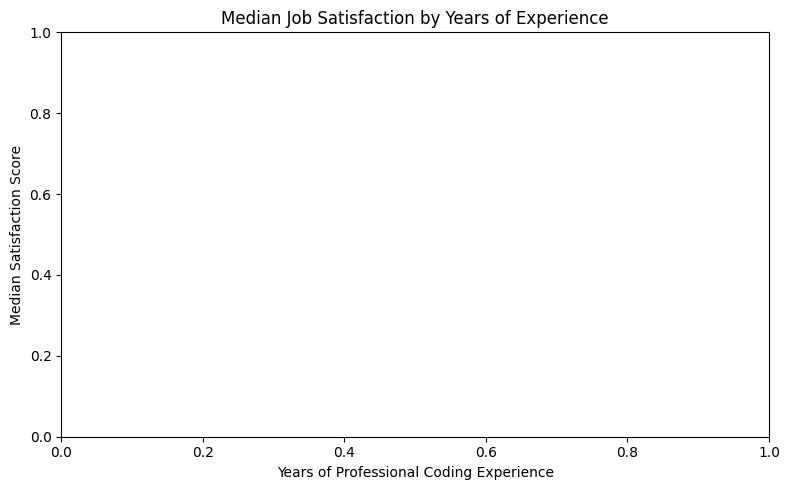

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Map JobSat to numeric satisfaction scores
job_sat_mapping = {
    'Very satisfied': 5,
    'Slightly satisfied': 4,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly dissatisfied': 2,
    'Very dissatisfied': 1
}
df['JobSat_Score'] = df['JobSat'].map(job_sat_mapping)

# Step 2: Clean YearsCodePro column
def clean_experience(val):
    if pd.isnull(val):
        return None
    if val == 'Less than 1 year':
        return 0.5
    if val == 'More than 50 years':
        return 51
    try:
        return float(val)
    except:
        return None

df['YearsCodePro_Clean'] = df['YearsCodePro'].apply(clean_experience)

# Step 3: Filter valid rows for analysis
df_exp = df[df['YearsCodePro_Clean'].notnull() & df['JobSat_Score'].notnull()]

# Step 4: Create experience bins
df_exp['ExperienceRange'] = pd.cut(
    df_exp['YearsCodePro_Clean'],
    bins=[0, 5, 10, 20, float('inf')],
    labels=['0–5 years', '5–10 years', '10–20 years', '20+ years']
)

# Step 5: Calculate median JobSat_Score per range
median_satisfaction = df_exp.groupby('ExperienceRange', observed=True)['JobSat_Score'].median().reset_index()

# Step 6: Visualize using bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='ExperienceRange', y='JobSat_Score', data=median_satisfaction, palette='Blues')
plt.title('Median Job Satisfaction by Years of Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Satisfaction Score')
plt.tight_layout()
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_301/3344122761.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='JobSat', order=[


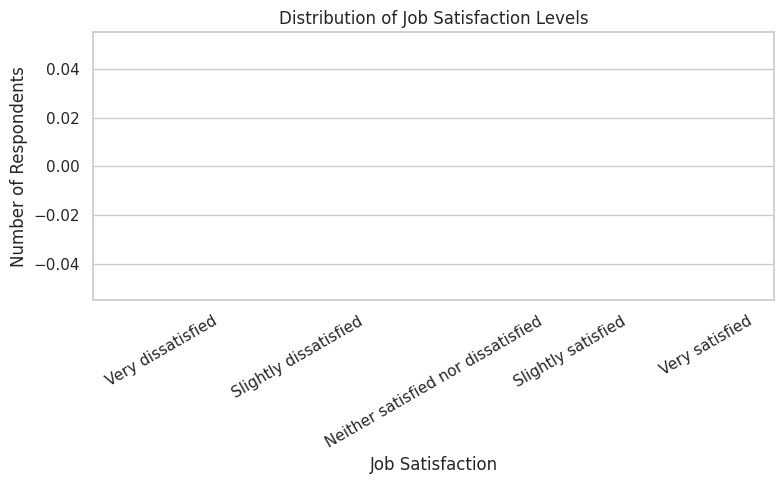

In [7]:
## Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Create count plot for JobSat column
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='JobSat', order=[
    'Very dissatisfied',
    'Slightly dissatisfied',
    'Neither satisfied nor dissatisfied',
    'Slightly satisfied',
    'Very satisfied'
], palette='coolwarm')

# Customize plot
plt.title('Distribution of Job Satisfaction Levels')
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_301/3066794088.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='RemoteWork', palette='pastel')


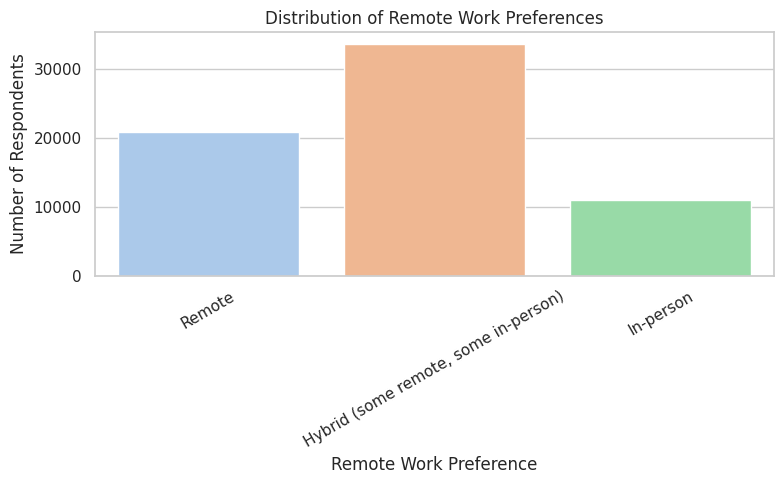

Remote Work Preference by Employment Type (%):
RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                43.63   
Employed, part-time                                                                46.37   
I prefer not to say                                                               100.00   
Independent contractor, freelancer, or self-emp...                                 32.56   
Not employed, and not looking for work                                             91.52   
Not employed, but looking for work                                                 87.23   
Retired                                                                            87.96   
Student, full-time                                                                 81.32   
Student, part-time               

In [9]:
## Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of RemoteWork preferences
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='RemoteWork', palette='pastel')
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Preference')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


# Split multiple employment types into separate rows
df_exploded = df.copy()
df_exploded['Employment'] = df_exploded['Employment'].fillna('Missing')
df_exploded['Employment'] = df_exploded['Employment'].str.split(';')
df_exploded = df_exploded.explode('Employment')

# Cross-tab of RemoteWork vs Employment
remote_by_employment = pd.crosstab(df_exploded['Employment'], df_exploded['RemoteWork'], normalize='index') * 100

# Display the percentage table
print("Remote Work Preference by Employment Type (%):")
print(remote_by_employment.round(2))



#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


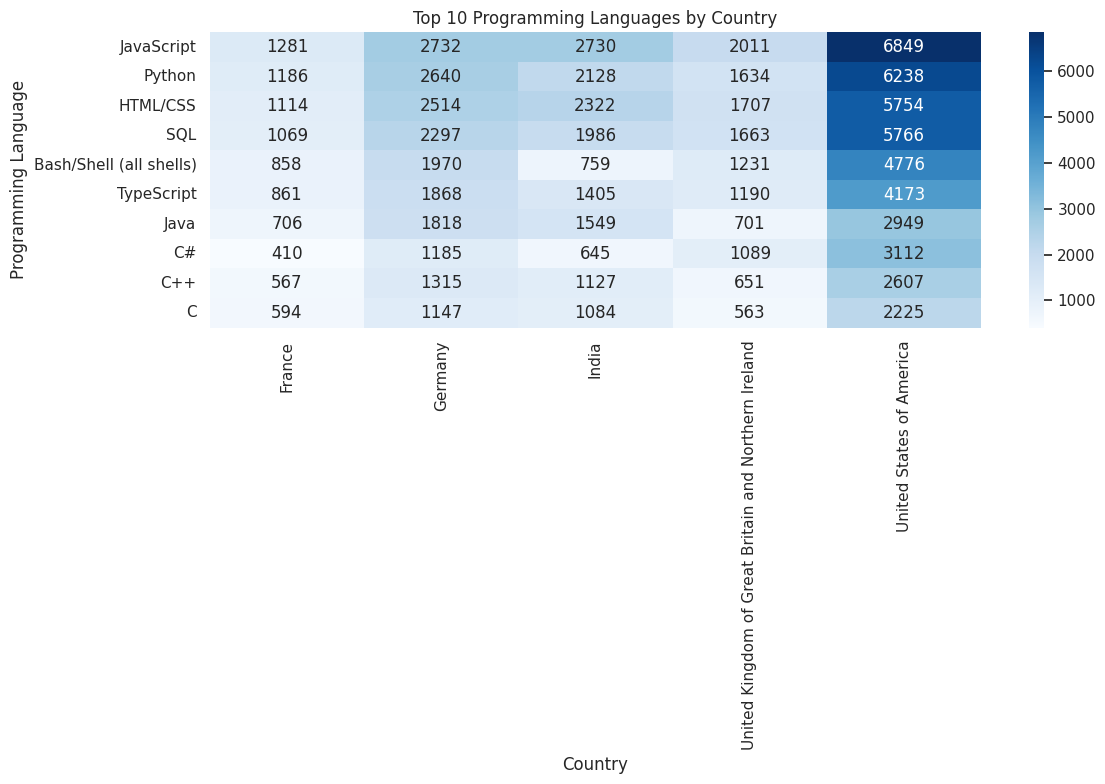

In [10]:
## Write your code here
# Filter rows with non-null values for Country and LanguageHaveWorkedWith
lang_df = df[['Country', 'LanguageHaveWorkedWith']].dropna()

# Split multiple languages into separate rows
lang_df['LanguageHaveWorkedWith'] = lang_df['LanguageHaveWorkedWith'].str.split(';')
lang_df = lang_df.explode('LanguageHaveWorkedWith')

# Clean whitespace
lang_df['LanguageHaveWorkedWith'] = lang_df['LanguageHaveWorkedWith'].str.strip()
lang_df['Country'] = lang_df['Country'].str.strip()

# Select top 5 countries by respondent count
top_countries = lang_df['Country'].value_counts().head(5).index.tolist()
lang_filtered = lang_df[lang_df['Country'].isin(top_countries)]

# Create cross-tab of language use by country
lang_region_crosstab = pd.crosstab(lang_filtered['LanguageHaveWorkedWith'], lang_filtered['Country'])

# Select top 10 languages overall for clarity
top_languages = lang_region_crosstab.sum(axis=1).sort_values(ascending=False).head(10).index
lang_region_crosstab = lang_region_crosstab.loc[top_languages]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(lang_region_crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('Top 10 Programming Languages by Country')
plt.xlabel('Country')
plt.ylabel('Programming Language')
plt.tight_layout()
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


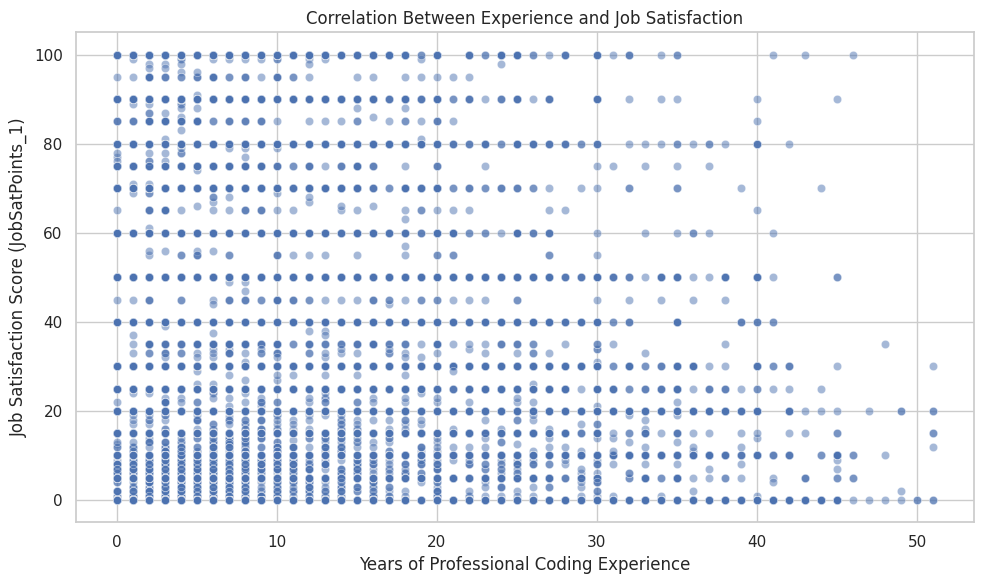

Pearson correlation: -0.028


In [11]:
## Write your code here
# Convert YearsCodePro to numeric, handling 'Less than 1 year' and 'More than 50 years'
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': '0',
    'More than 50 years': '51'
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows with missing values in either column
corr_df = df[['YearsCodePro', 'JobSatPoints_1']].dropna()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=corr_df, x='YearsCodePro', y='JobSatPoints_1', alpha=0.5)
plt.title('Correlation Between Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score (JobSatPoints_1)')
plt.tight_layout()
plt.show()

correlation = corr_df['YearsCodePro'].corr(corr_df['JobSatPoints_1'])
print(f"Pearson correlation: {correlation:.3f}")


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                1059   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      16806   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   11011   
Primary/elementary school                                           160   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     2073   
Secondary school (e.g. American high school, Ge...                 1460   
Some college/university study without earning a...                 3579   
Something else                                                      377   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate degree (A.A., A.S., etc.)                        

/tmp/ipykernel_301/2007964541.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


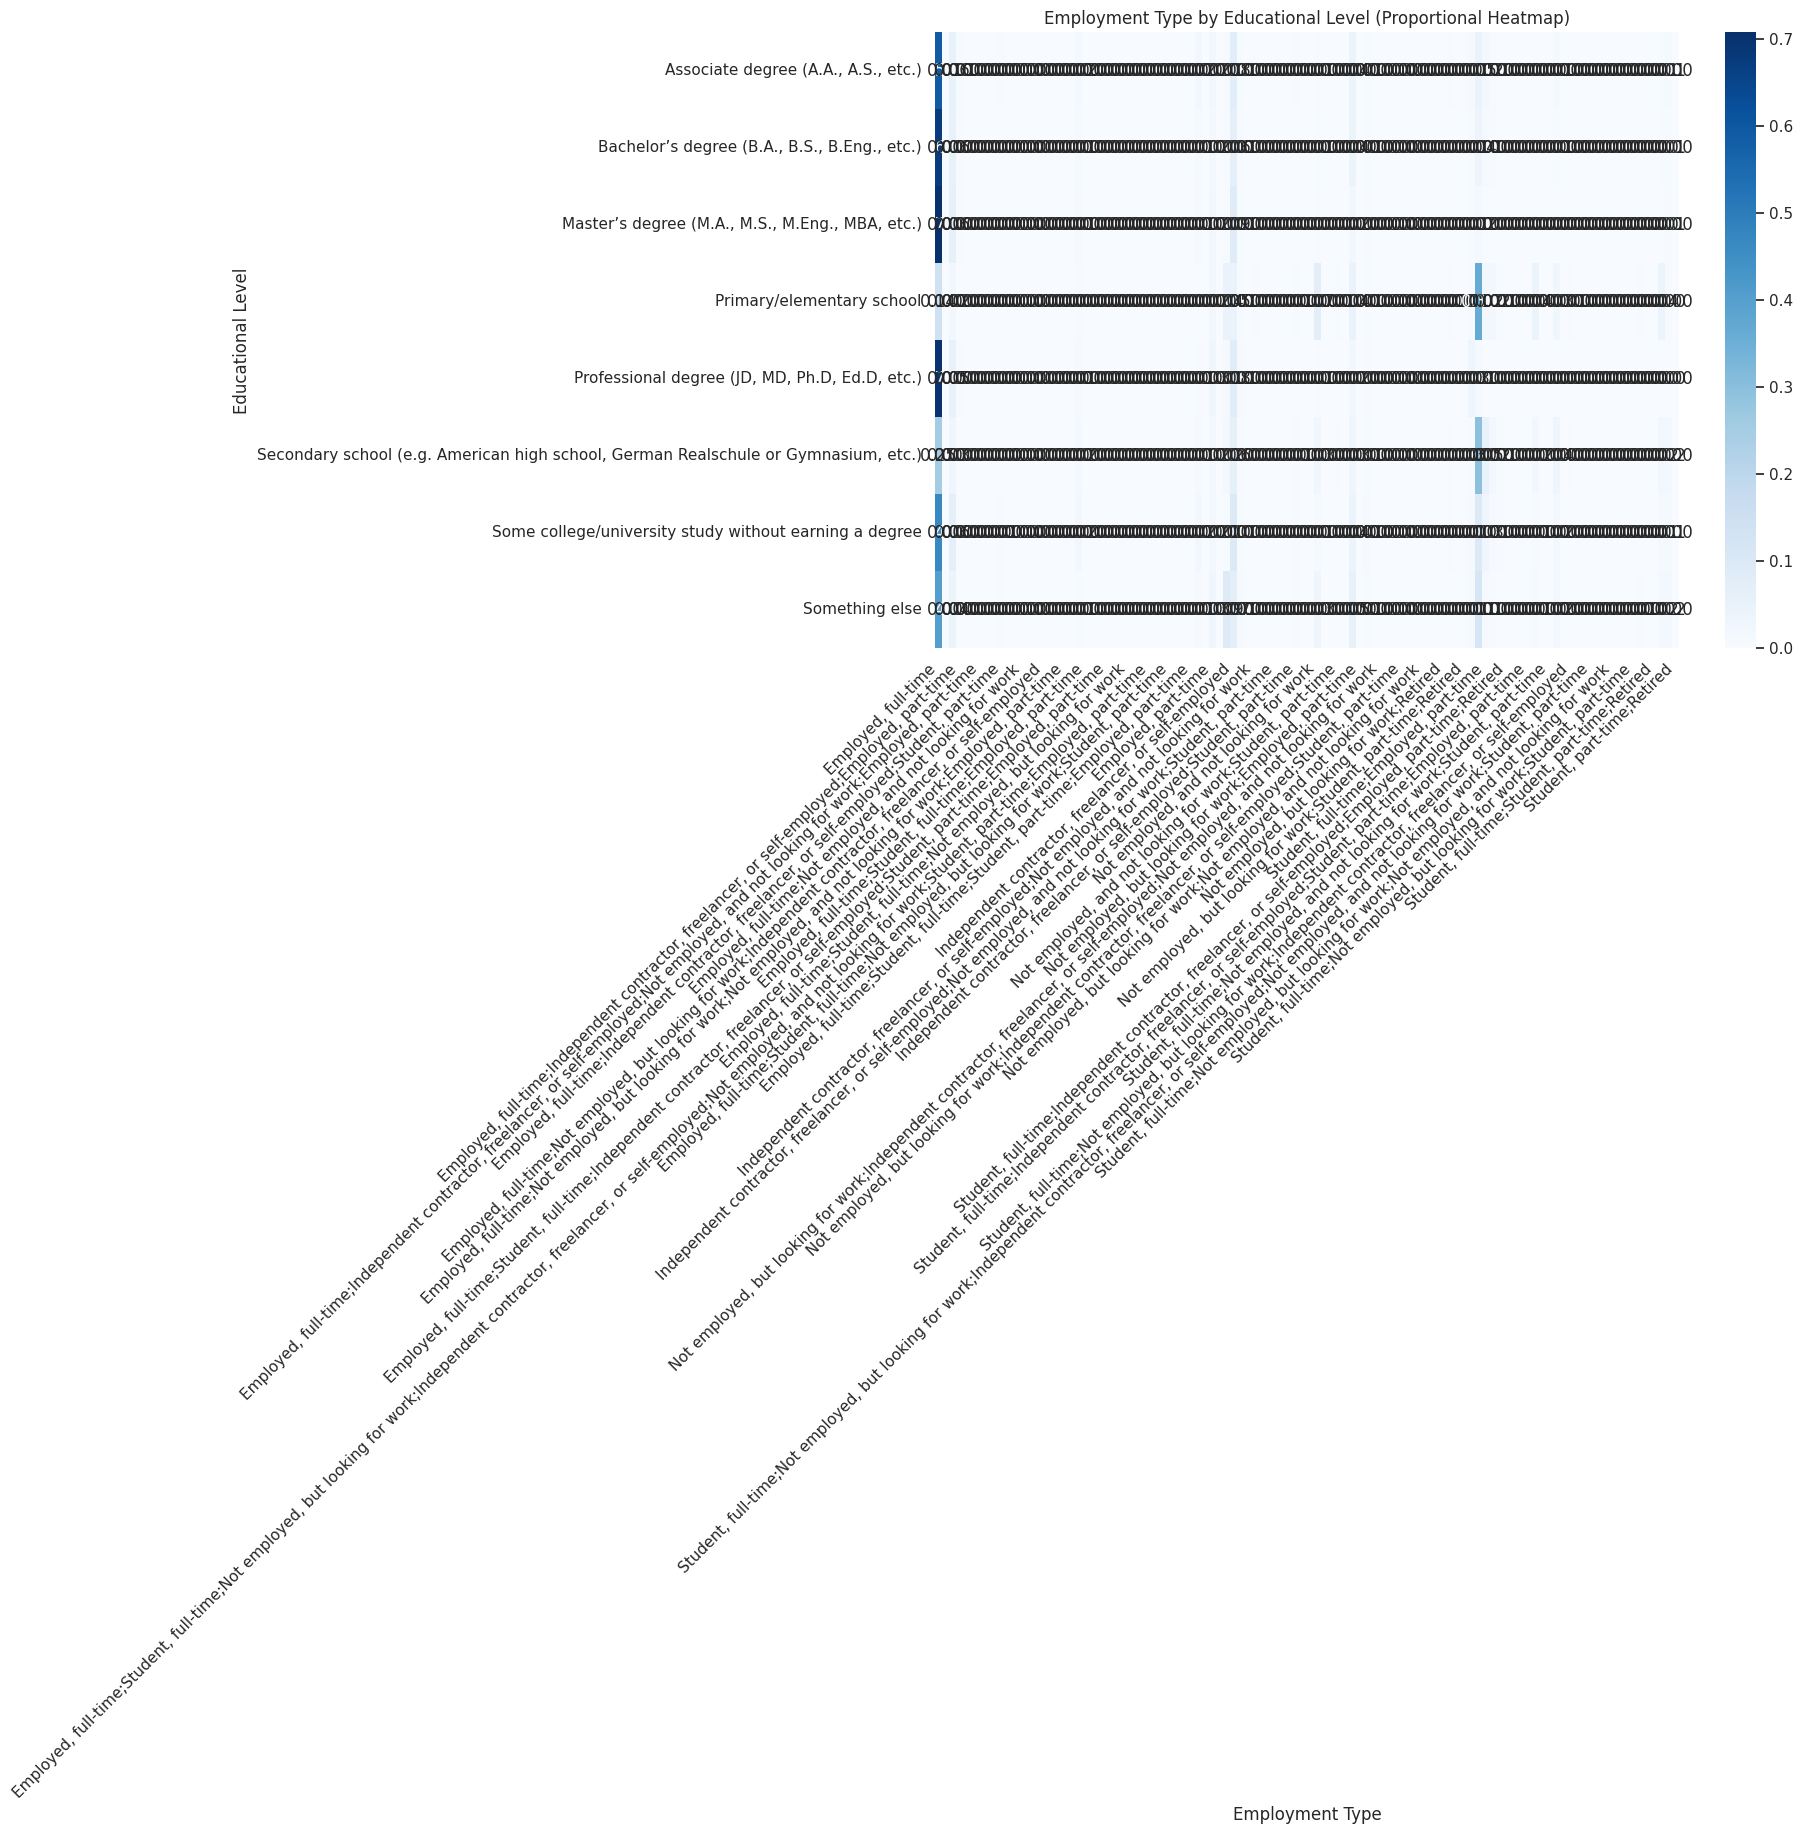

In [12]:
## Write your code here
# Create a cross-tabulation table
education_employment_ct = pd.crosstab(df['EdLevel'], df['Employment'])

# Display the cross-tab table
print(education_employment_ct)

import seaborn as sns
import matplotlib.pyplot as plt

# Normalize row-wise for proportion of employment types per education level
education_employment_pct = education_employment_ct.div(education_employment_ct.sum(axis=1), axis=0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(education_employment_pct, cmap="Blues", annot=True, fmt=".2f")
plt.title('Employment Type by Educational Level (Proportional Heatmap)')
plt.xlabel('Employment Type')
plt.ylabel('Educational Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [13]:
## Write your code here
# Save the cleaned DataFrame to a CSV file
df.to_csv('cleaned_stackoverflow_data.csv', index=False)

print("Dataset successfully saved as 'cleaned_stackoverflow_data.csv'")


Dataset successfully saved as 'cleaned_stackoverflow_data.csv'


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
